In [15]:
!pip install osmnx

In [16]:
import osmnx as ox

place = "Kallio, Helsinki, Finland"
gdf = ox.geocoder.geocode_to_gdf(place)

<Axes: >

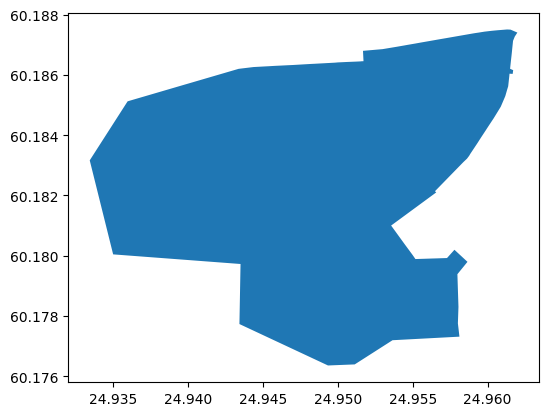

In [17]:
gdf.plot()

In [18]:
!pip install folium matplotlib mapclassify
gdf.explore()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.1/59.1 kB 3.6 MB/s eta 0:00:00


In [19]:
import osmnx as ox

place = "Kallio, Helsinki, Finland"
gdf = ox.geocoder.geocode_to_gdf(place)

# Assume area_gdf should be the same as gdf for this example
# You might need to adjust this based on how you intend to define the Kamppi area
area_gdf = gdf

Kallio_polygon = area_gdf.unary_union # Use unary_union instead of union_all

<ipython-input-19-95f4fd589e7f>:10: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  Kallio_polygon = area_gdf.unary_union # Use unary_union instead of union_all


In [20]:
buildings_gdf = ox.features_from_polygon(
    Kallio_polygon,
    tags = {"building": True, "highway": True, "railway": "station", "station": "subway"}
)

In [21]:
streets_graph = ox.graph_from_polygon(Kallio_polygon, network_type="all")
streets_gdf = ox.graph_to_gdfs(streets_graph, nodes=True)

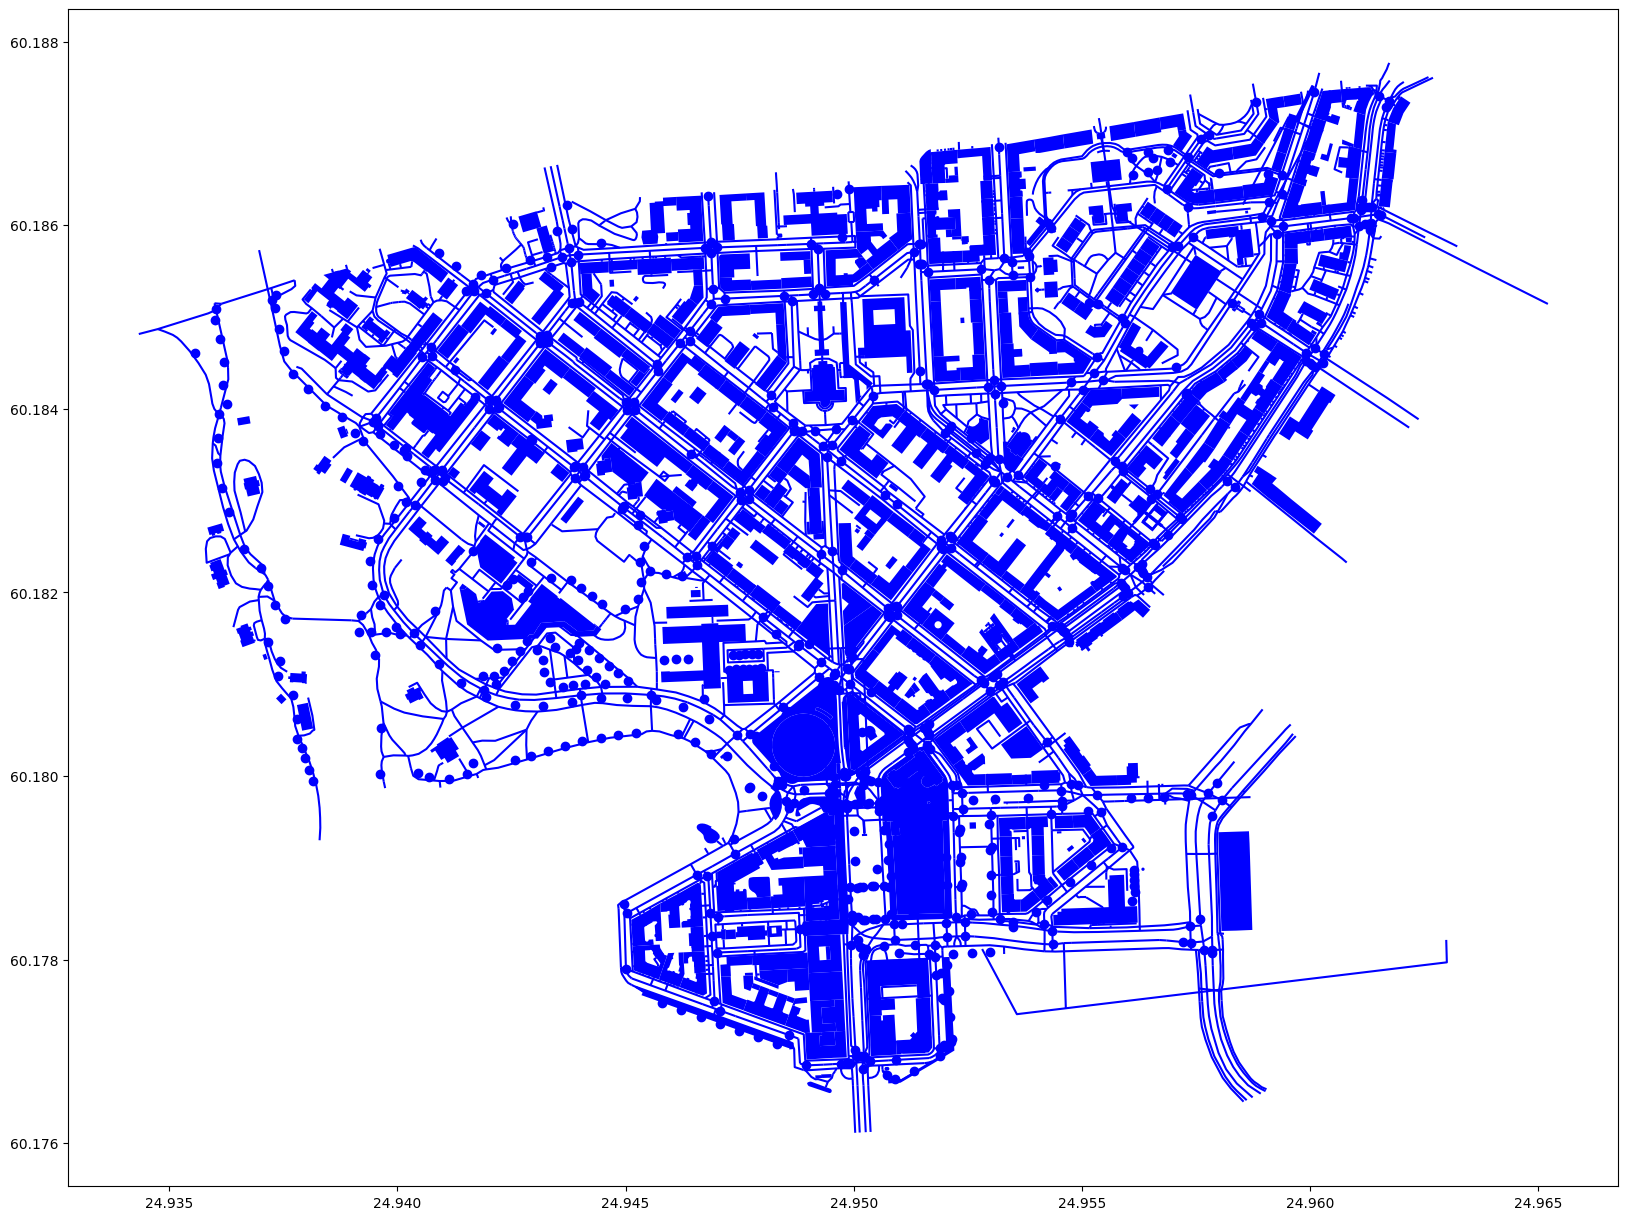

In [22]:
ax = buildings_gdf.plot(figsize=(20, 20), color="blue")